In [141]:
import pandas as pd
%matplotlib inline
import json
import sys

import gensim as gensim

from numpy import genfromtxt 
from numpy import linalg
from numpy import array
import seaborn as sns; sns.set()
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

# Do some NLP on this
* Basic NLP

In [142]:
import nltk

#nltk.download()
f = open('data/corpus.txt', 'rU')
text = f.read()
text1 = text.lower()



/Users/peadarcoyle/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 'U' mode is deprecated


In [149]:
words = nltk.tokenize.word_tokenize(text1)

fdist= nltk.FreqDist(words)
print(fdist)

<FreqDist with 2677 samples and 16714 outcomes>


In [150]:
import nltk
import string
words2 = [word for word in words if not all(char in string.punctuation for char in word)]

# Remove contractions - wods that begin with '
words3 = [word for word in words2 if not (word.startswith("'") and len(word) <=2)]

words4 = [word for word in words3 if word.isalpha() ]

In [151]:
from collections import Counter
c = Counter(words4)
c.most_common(n=20)


[('the', 567),
 ('and', 471),
 ('to', 470),
 ('a', 417),
 ('you', 340),
 ('of', 314),
 ('i', 290),
 ('data', 265),
 ('in', 249),
 ('is', 233),
 ('that', 231),
 ('do', 183),
 ('it', 130),
 ('on', 125),
 ('what', 121),
 ('for', 120),
 ('have', 110),
 ('about', 103),
 ('how', 103),
 ('with', 102)]

In [146]:
stopwords = nltk.corpus.stopwords.words('english')
new_c = c.copy()
for key in c:
    if key in stopwords:
        del new_c[key]
new_c.most_common(n=30)

import pandas as pd
vc = pd.Series(new_c.most_common(n=30))



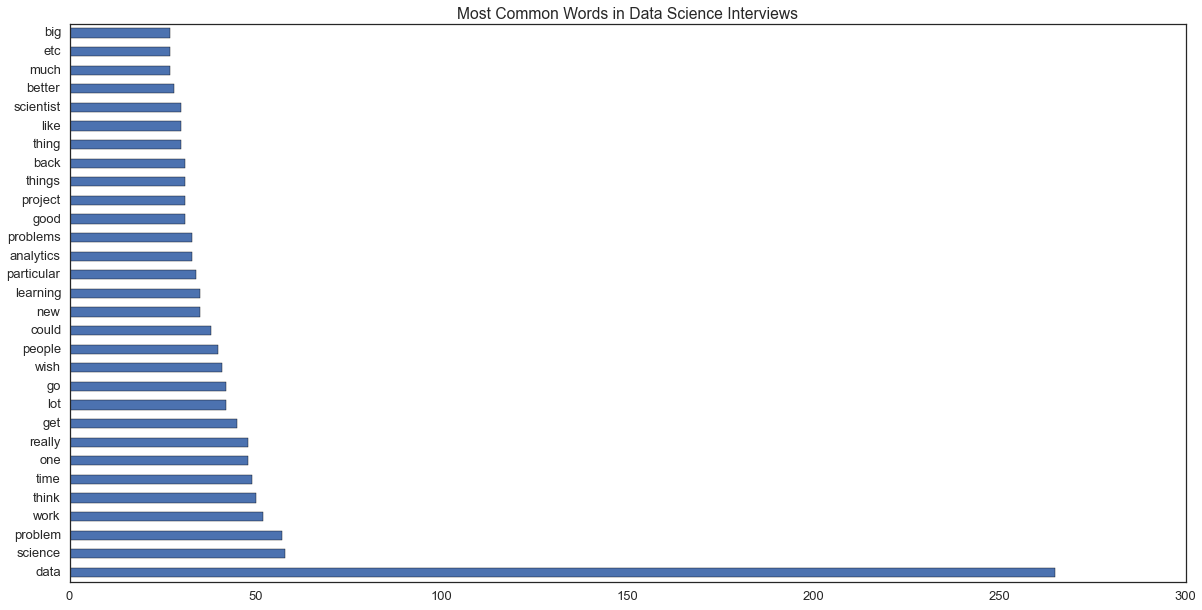

In [147]:

from collections import OrderedDict
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
df = pd.Series(OrderedDict(new_c.most_common(n=30)))
sns.set(style="white", context="talk")
Fig = df.plot(kind='barh', title='Most Common Words in Data Science Interviews')
plt.savefig('barchart_nlp.png')